# Import Libraries

In [1]:
from sklearn import preprocessing
import pandas as pd
from sklearn import datasets
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline

# Naive Bayes (Gaussian Naive Bayes) Scikit Learn

## Persiapkan atribut dan label

In [2]:
# features
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']
# target
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

## Label encoding

In [3]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)


## Combining Features and Target

In [4]:
features=list(zip(weather_encoded,temp_encoded))

## NB Modelling

In [5]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted)

Predicted Value: [1]


# Naive Bayes (Multilabel Naive Bayes)

## Load Data

In [6]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

## Check features and label

In [7]:
# print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


## Check dimensi data

In [8]:
# print data(feature)shape
wine.data.shape

(178, 13)

## Train Test Split

In [9]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set (70,30)
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109) 

## Modeling

In [10]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

GaussianNB()

## Testing Model

In [11]:
#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [12]:
y_pred

array([0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 2, 1,
       0, 2, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 2, 1, 0, 0,
       0, 2, 2, 0, 1, 1, 2, 0, 0, 2])

## Metrics Accuracy

In [13]:
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


# Decision Tree

## Load Libraries

In [14]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

## Load Data

In [15]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# load dataset
pima = pd.read_csv("./dataset/diabetes.csv", header=None, names=col_names)

In [16]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


## Check tipe data setiap atribut

In [17]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  769 non-null    object
 1   glucose   769 non-null    object
 2   bp        769 non-null    object
 3   skin      769 non-null    object
 4   insulin   769 non-null    object
 5   bmi       769 non-null    object
 6   pedigree  769 non-null    object
 7   age       769 non-null    object
 8   label     769 non-null    object
dtypes: object(9)
memory usage: 54.2+ KB


## Convert another data types

In [18]:
numer = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree', 'label']
for col in numer: # coerce for missing values
    pima[col] = pd.to_numeric(pima[col], errors='coerce')

## Dropping Missing Values (Standard Values)

In [19]:
pima.dropna(inplace=True)

## Split data into attributes and target

In [20]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

X = pima[feature_cols] # Features
y = pima.label # Target variable

## Train test split

In [21]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Create Decision Tree Model

In [22]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

## Testing Model

In [23]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [24]:
y_pred

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0.

## Metrics Accuracy

In [25]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6883116883116883


# Random Forest

## Load iris dataset

In [26]:
iris  = datasets.load_iris()

## Getting closer to data

In [27]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## Create Dataframe Iris

In [28]:
iris_df = pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,1],
    'petal width':iris.data[:,1],
    'species' : iris.target
})

In [29]:
iris_df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,3.5,3.5,0
1,4.9,3.0,3.0,3.0,0
2,4.7,3.2,3.2,3.2,0
3,4.6,3.1,3.1,3.1,0
4,5.0,3.6,3.6,3.6,0


## Train test split

In [30]:
features = iris_df.drop('species',axis=1).columns
target = 'species'

X = iris_df[features]
y = iris_df[target]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Generate Model

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf_clf = RandomForestClassifier(n_estimators=100)

# fit training data into model
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

## Evaluate the Model

In [34]:
y_pred = rf_clf.predict(X_test)

In [35]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6888888888888889


## Importance Features in Random Forest
***
Seberapa sering suatu fitur X muncul di set of *n* DT yang terbentuk

In [36]:
features_important = pd.Series(rf_clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)

<AxesSubplot:>

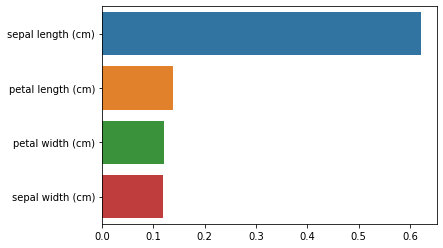

In [37]:
sns.barplot(x=features_important,y=features_important.index)

# SVM

## SVM Kernel
***
1. Linear Kernel
2. Radial Basis Function kernel (Kernel untuk data yang berbentuk menyerupai lingkaran)
3. Polynomial kernel

## Generate Data
***
Using Data Iris

In [38]:
X_train_svm = X_train
X_test_svm = X_test
y_train_svm = y_train
y_test_svm = y_test

## Generate Model

In [39]:
from sklearn import svm

In [40]:
# create SVM model using Linear Kernel
svm_clf = svm.SVC(kernel='rbf')

# Fitting train data into model
svm_clf.fit(X_train_svm,y_train_svm)

SVC()

## Model Evaluation

In [41]:
y_pred_svm = svm_clf.predict(X_test_svm)

In [42]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6888888888888889


### Confusion Matrix

In [43]:
confusionmatrix_svm = confusion_matrix(y_test_svm,y_pred)

In [46]:
confusionmatrix_svm

array([[14,  0,  0],
       [ 1, 10,  7],
       [ 0,  6,  7]], dtype=int64)